# Radiative excitation / de-excitation

- formula:
  - photoexcitation: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)
  - photo-de-excitation: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
element = lss.O1Inasan()
"""
13S3S - fast level
12P1D4 - 
"""
element.keys = element.all_keys
# element.keys = ["12P3P4", "12P1D4", "13S3S"]
# element.keys = ["12P3P4", "13S3S"]

population_nlte_1 = [0.0 for _ in range(len(element.keys))]
population_nlte_1[0] = 1.0

count = int(10)
temperatures = np.linspace(1.0e1, 1.0e10, num=count)
optical_depth = 0.0

delta_time = 0.01

In [3]:
re_balance = ["pe_tasitsiomi"]
# re_balance = ["se_nist_o1", "pe_tasitsiomi"]

b_factors = calculate_b_factors(
    element=element,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *re_balance,
    ]
)

/home/deverte/Projects/progs/astro/nlte/tests/utils.py:119: RuntimeWarning: divide by zero encountered in divide
  b_factors[i] = population_nlte_2 / population_lte
/home/deverte/Projects/progs/astro/nlte/tests/utils.py:119: RuntimeWarning: invalid value encountered in divide
  b_factors[i] = population_nlte_2 / population_lte


/tmp/ipykernel_109682/3131461323.py:4: RuntimeWarning: invalid value encountered in log10
  np.log10(b_factors.T[i]),
/tmp/ipykernel_109682/3131461323.py:4: RuntimeWarning: divide by zero encountered in log10
  np.log10(b_factors.T[i]),


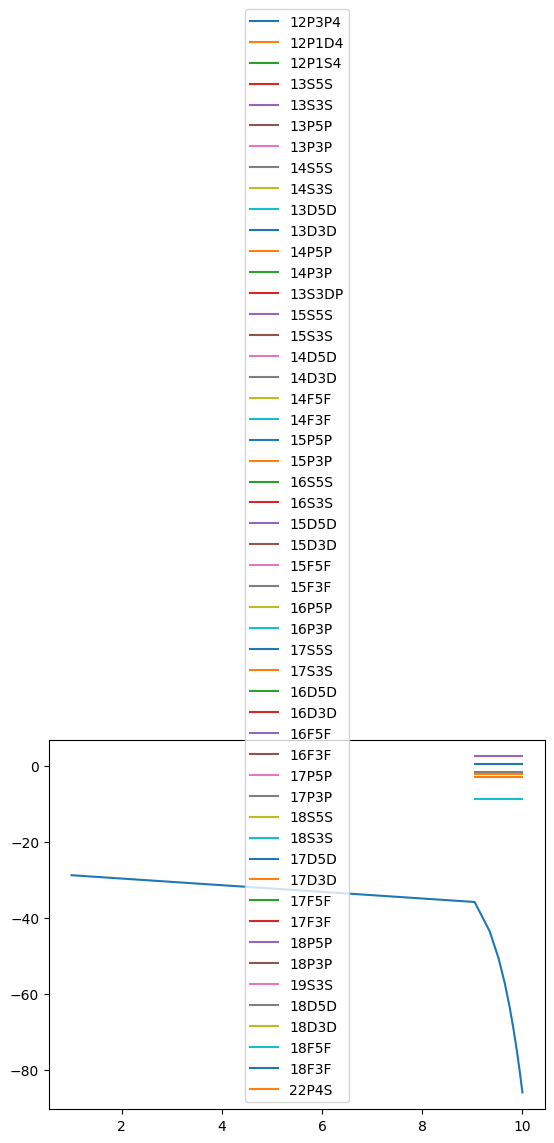

In [4]:
for i, key in enumerate(element.keys):
    plt.plot(
        np.log10(temperatures),
        np.log10(b_factors.T[i]),
        label=key,
    )
plt.legend()
plt.show()